In [28]:
%matplotlib notebook
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import scipy.optimize #fmin_cg to train neural network
import itertools
from scipy.special import expit #Vectorized sigmoid function

Loading and Visualizing Data ...


<IPython.core.display.Javascript object>


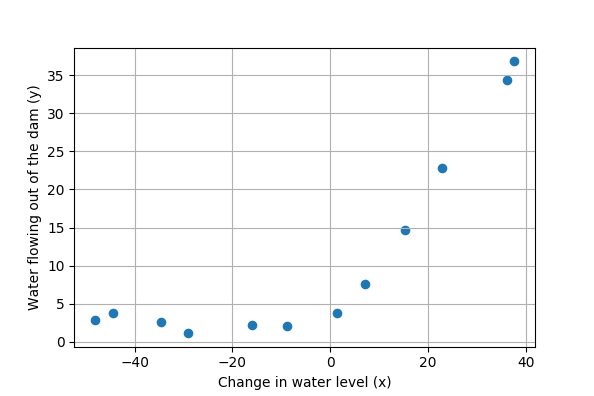

In [146]:
# %load ex5.m
## Machine Learning Online Class
#  Exercise 5 | Regularized Linear Regression and Bias-Variance
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     linearRegCostFunction.m
#     learningCurve.m
#     validationCurve.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.

## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

# Load Training Data
print('Loading and Visualizing Data ...')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
datafile = 'ex5data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'].T, mat['y'].T
Xval, yval = mat['Xval'].T, mat['yval'].T
Xtest, ytest = mat['Xtest'].T, mat['ytest'].T

# m = Number of examples
m = X.shape[1]

# Plot training data
fig, ax = plt.subplots(1)
ax.scatter(X, y)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.grid('on')

In [182]:
def h(theta, X):
    return dot(theta.T, X)

In [194]:
dot(theta.T, _X).shape

(1, 12)

In [298]:
# %load linearRegCostFunction.m
def linearRegCostFunction(theta, _X, y, lam):
    #LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    #regression with multiple variables
    #   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    #   cost of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the cost in J and the gradient in grad

    # Initialize some useful values
    m = y.shape[1] # number of training examples
    _h = h(theta, _X)
    J = 1.0 / (2*m) * sum((_h - y )**2) + lam / (2.0* m) * sum(theta**2)
    return J


In [299]:
# %load linearRegCostFunction.m
def linearRegCostFunctionGrad(theta, _X, y, lam):
    #LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    #regression with multiple variables
    #   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    #   cost of using theta as the parameter for linear regression to fit the 
    #   data points in X and y. Returns the cost in J and the gradient in grad

    # Initialize some useful values
    m = y.shape[1] # number of training examples
    _h = h(theta, _X)
    grad0 = 1/m * (_h-y).dot(_X[0,:])
    try:
        grad1 = 1/m * dot(_X[1:,:], (_h-y).T) + lam/m*theta[1:,:]
    except IndexError:
        theta = theta[:, None]
        grad1 = 1/m * dot(_X[1:,:], (_h-y).T) + lam/m*theta[1:,:]
    grad = np.r_[grad0[:,None], grad1]

    return grad


In [300]:
## =========== Part 2: Regularized Linear Regression Cost =============
#  You should now implement the cost function for regularized linear 
#  regression. 

theta = np.array([1 , 1])[:, None]

J = linearRegCostFunction(theta, np.r_[ones((1, m)), X], y, 1)

print('Cost at theta = [1 ; 1]: {} (this value should be about 303.993192)\n'.format(J))

Cost at theta = [1 ; 1]: 304.0348588869309 (this value should be about 303.993192)



In [301]:
## =========== Part 3: Regularized Linear Regression Gradient =============
#  You should now implement the gradient for regularized linear 
#  regression.
#

grad = linearRegCostFunctionGrad(theta, np.r_[ones((1, m)), X], y, 1)

print(('Gradient at theta = [1 ; 1]:  [{}; {}] '
         '(this value should be about [-15.303016; 598.250744])').format(*grad))

Gradient at theta = [1 ; 1]:  [[-15.30301567]; [ 598.25074417]] (this value should be about [-15.303016; 598.250744])


In [304]:
# %load trainLinearReg.m
def trainLinearReg(X, y, lam):
    #TRAinLinEARREG Trains linear regression given a dataset (X, y) and a
    #regularization parameter lambda
    #   [theta] = TRAinLinEARREG (X, y, lambda) trains linear regression using
    #   the dataset (X, y) and regularization parameter lambda. Returns the
    #   trained parameters theta.
    m = y.shape[1]
    # initialize Theta
    initial_theta = zeros((1, X.shape[0]+1))

    # Create "short hand" for the cost function to be minimized
    args = (X, y, lam)

    # Minimize using fmincg
    theta = scipy.optimize.fmin_cg(linearRegCostFunction, initial_theta, linearRegCostFunctionGrad, args ,maxiter=200)

    return theta


In [296]:
initial_theta = zeros((X.shape[0]+1, 1))
initial_theta.shape

(2, 1)

In [281]:
X.shape

(1, 12)

In [306]:
lam = 0;
theta = trainLinearReg(np.r_[ones((1, m)), X], y, lam);


ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [ ]:
## =========== Part 4: Train Linear Regression =============
#  Once you have implemented the cost and gradient correctly, the
#  trainLinearReg function will use your cost function to train 
#  regularized linear regression.
# 
#  Write Up Note: The data is non-linear, so this will not give a great 
#                 fit.
#

#  Train linear regression with lambda = 0
lam = 0;
theta = trainLinearReg(X, y, lam);

#  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

In [ ]:
## =========== Part 5: Learning Curve for Linear Regression =============
#  Next, you should implement the learningCurve function. 
#
#  Write Up Note: Since the model is underfitting the data, we expect to
#                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
#

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t#d\t\t#f\t#f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;

## =========== Part 6: Feature Mapping for Polynomial Regression =============
#  One solution to this is to use polynomial regression. You should now
#  complete polyFeatures to map each example into its powers
#

p = 8;

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  # Normalize
X_poly = [ones(m, 1), X_poly];                   # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           # Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  #f  \n', X_poly(1, :));

fprintf('\nProgram paused. Press enter to continue.\n');
pause;



## =========== Part 7: Learning Curve for Polynomial Regression =============
#  Now, you will get to experiment with polynomial regression with multiple
#  values of lambda. The code below runs polynomial regression with 
#  lambda = 0. You should try running the code with different values of
#  lambda to see how the fit and learning curve change.
#

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

# Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = #f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = #f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = #f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t#d\t\t#f\t#f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;

## =========== Part 8: Validation for Selecting Lambda =============
#  You will now implement validationCurve to test various values of 
#  lambda on a validation set. You will then use this to select the
#  "best" lambda value.
#

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' #f\t#f\t#f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;